In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc, and_


In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [11]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Create our session (link) from Python to the DB
session = Session(engine) 

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
sel = [Measurements.date]

dates = session.query(*sel).order_by(desc(Measurements.date)).first()

dates

('2017-08-23',)

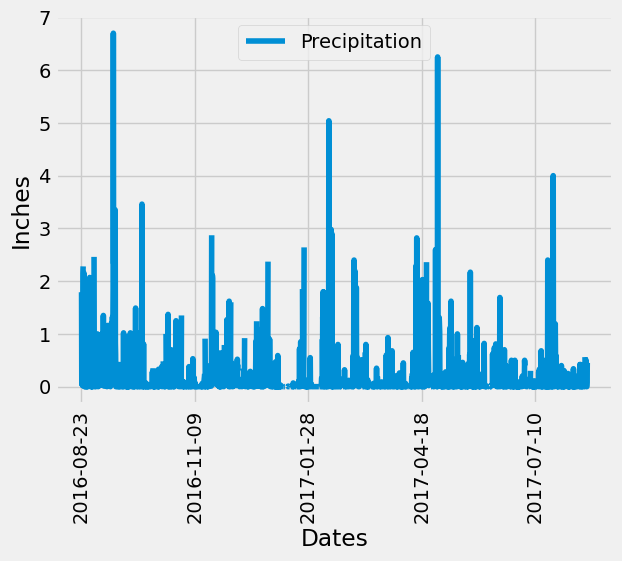

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

#From 03/08/2017 to 03/08/2016 it is a year and a day. 

# Perform a query to retrieve the data and precipitation scores

sel = [Measurements.date, Measurements.prcp]
precip_data = session.query(*sel).filter(Measurements.date >= "2016-08-23").all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

precip_df = pd.DataFrame(precip_data, columns=["Dates", "Precipitation"])

# Sort the dataframe by date

precip_df = precip_df.sort_values(by = "Dates", ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data

precip_df.plot('Dates', 'Precipitation')
plt.xlabel("Dates")
plt.ylabel("Inches")
plt.xticks(rotation = 90)

plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
station_num = session.query(Stations.id).order_by(desc(Stations.id)).first()

station_num

(9,)

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

#define the counting column of this query
counts = func.count(Measurements.station)

#filtering the query
station_num = session.query(Measurements.station, counts).group_by(Measurements.station).order_by(desc(counts)).all()

station_num

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

#the Most active station is Station 'USC00519281'
sel = [func.min(Measurements.tobs), func.max(Measurements.tobs), func.avg(Measurements.tobs)]
busy_station = session.query(*sel).filter(Measurements.station == "USC00519281").all()

busy_station

[(54.0, 85.0, 71.66378066378067)]

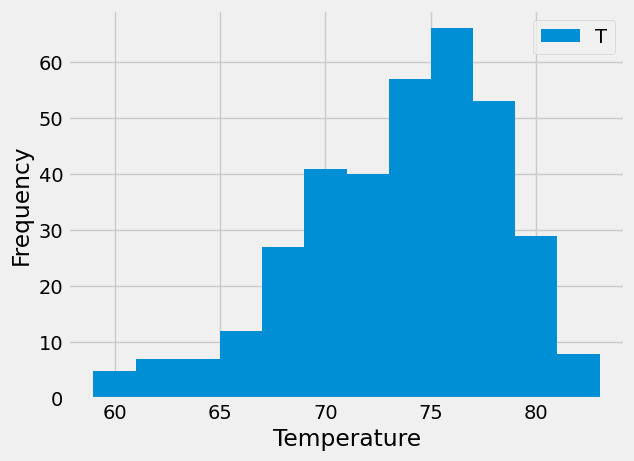

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurements.tobs]
waihee_station = session.query(*sel).filter(Measurements.station == "USC00519281").filter(Measurements.date >= "2016-08-23").all()
waihee_station
waihee_df = pd.DataFrame(waihee_station)

waihee_df.hist(bins=12)
plt.title("")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend("Tobs")


# Close Session

In [16]:
# Close Session
session.close()